In [5]:
import random

import matplotlib.pyplot as plt


def calcbeta(alpha, beta, maximum, offset=0):
    return [round(maximum * random.betavariate(alpha, beta)) + offset for _ in
            range(500)]


def plotbeta(betas, cumulative=False):
    hist = plt.hist(betas, max(betas) - min(betas), density=True, histtype='step',
                    cumulative=cumulative)
    return hist

In [ ]:
import numpy as np

beta = calcbeta(alpha=0.3, beta=2, maximum=3)
print(beta)
print(np.histogram(beta, bins=3))

[array([0.736, 0.182, 0.082]), array([0., 1., 2.])]
[array([0.72 , 0.222, 0.058]), array([1., 2., 3.])]


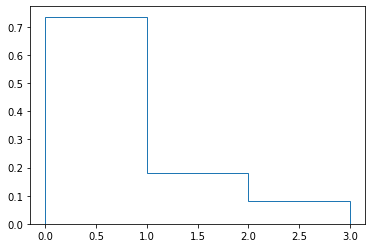

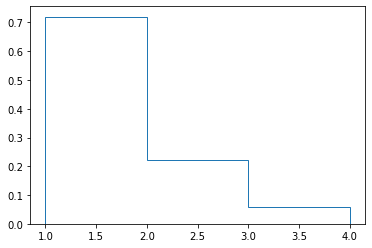

In [7]:
# works from home / rarely leaves
beta = calcbeta(alpha=0.3, beta=2, maximum=3)
hist = plotbeta(beta)
p1_week = [hist[0], hist[1][:-1]]
print(p1_week)

# works outside / rarely leaves
beta = calcbeta(alpha=0.3, beta=2, maximum=3, offset=1)
plt.figure(2)
hist = plotbeta(beta)
p2_week = [hist[0], hist[1][:-1]]
print(p2_week)

[array([0.464, 0.346, 0.19 ]), array([0., 1., 2.])]
[array([0.51 , 0.326, 0.164]), array([1., 2., 3.])]


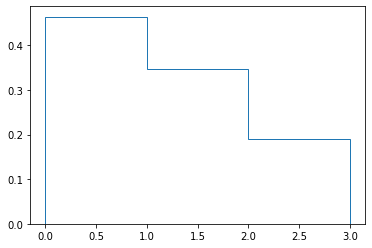

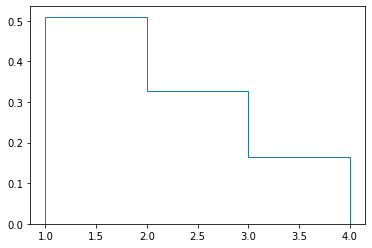

In [8]:
# works from home / leaves often
beta = calcbeta(0.5, 1.5, 3)
hist = plotbeta(beta)
p3_week = [hist[0], hist[1][:-1]]
print(p3_week)

# works outside / leaves often
beta = calcbeta(0.5, 1.5, 3, 1)
plt.figure(2)
hist = plotbeta(beta)
p3_week = [hist[0], hist[1][:-1]]
print(p3_week)

[array([0.282, 0.45 , 0.268]), array([0., 1., 2.])]
[array([0.262, 0.464, 0.274]), array([1., 2., 3.])]


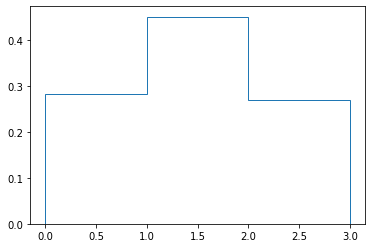

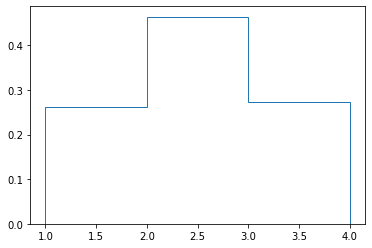

In [9]:
# works from home / leaves very often
beta = calcbeta(1, 2, 3)
hist = plotbeta(beta)
p4_week = [hist[0], hist[1][:-1]]
print(p4_week)

# works outside / leaves very often
beta = calcbeta(1, 2, 3, 1)
plt.figure(2)
hist = plotbeta(beta)
p4_week = [hist[0], hist[1][:-1]]
print(p4_week)

In [2]:
from elevatorsim.buildingprofile import StandardProfile
from elevatorsim.building import Building
from elevatorsim.elevator import Elevator

elevator = Elevator()
building = Building(profile=StandardProfile(), elevator=elevator)
building.elevator.floor = 10
for floor in [6, 7, 5, 11]:
    building.elevator.push(floor)
print(building.elevator.order_up)
print(building.elevator.order_down)

[11]
[-7, -6, -5]


In [3]:
building.elevator.peek()

7

In [ ]:
from elevatorsim.physics import Physics

engine = Physics(building, debug=True)
engine.move_elevator(0, 20)
